In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

# S&P 500 1970 - 2020, expected returns by years elapsed

In [224]:
# Read file
df_raw = pd.read_csv("SP500_1970-2020.csv", index_col='Date', parse_dates=True, thousands=",")
df_proc = df_raw.copy()

# Change to datetime
df_proc.index = [datetime.strptime(n, '%b %y') for n in df_proc.index]

In [255]:
### data = SP500
df_out = pd.DataFrame(data = np.nan, columns = np.arange(1970, 2021, 1).astype(str),
                      index = np.arange(1, 21, 1).astype(str))

for time_years in np.arange(1, 31):
    #time_years = 4
    year = 1970
    data = df_proc

    df = pd.DataFrame({"Change":np.nan}, index = np.arange(1970, 2021, 1).astype(str))
    
    while year + time_years <= 2020:
        start = data.loc[str(year)].iloc[0]["Open"]
        end = data.loc[str(year+time_years)].iloc[0]["Open"]
        df.loc[str(year), "Change"] = (end-start)/start
        year += 1

    df_out.loc[str(time_years)] = df.values.flatten()
    
df_out.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,0.077867,0.241302,-0.178623,-0.271627,0.307163,0.119027,-0.071205,0.001898,0.117356,0.323662,...,0.135880,0.275506,0.143495,0.008302,0.056286,0.202225,0.054970,0.126626,0.077151,NaN
2,0.337959,0.019577,-0.401731,-0.047897,0.462751,0.039347,-0.069442,0.119477,0.479002,0.190185,...,0.448821,0.458534,0.152988,0.065055,0.269894,0.268311,0.188556,0.213546,NaN,NaN
3,0.098968,-0.257368,-0.217965,0.065428,0.358596,0.041320,0.039765,0.481810,0.329860,0.305200,...,0.656719,0.470643,0.217885,0.280436,0.339699,0.428912,0.280254,NaN,NaN,NaN
4,-0.199541,-0.029258,-0.124882,-0.010435,0.361175,0.163525,0.376298,0.332384,0.458373,0.567163,...,0.670473,0.553419,0.464172,0.350821,0.509340,0.539154,NaN,NaN,NaN,NaN
5,0.046330,0.086286,-0.187195,-0.008557,0.520917,0.540114,0.237512,0.461141,0.751079,0.540882,...,0.764498,0.867560,0.544657,0.521871,0.625787,NaN,NaN,NaN,NaN,NaN


In [256]:
# Process
stats_by_year = df_out.T.describe().T
stats_by_year["Years_elapsed"] = stats_by_year.index

# Convert to %
stats_by_year[["mean", "std", "min", "25%", "50%", "75%", "max"]] = stats_by_year[["mean", "std", "min", "25%", "50%", "75%", "max"]] * 100

# Re-order columns
stats_by_year = stats_by_year[["Years_elapsed"] + list(stats_by_year.columns.drop("Years_elapsed"))]
stats_by_year.to_csv("returns_SP500.csv", index = False)

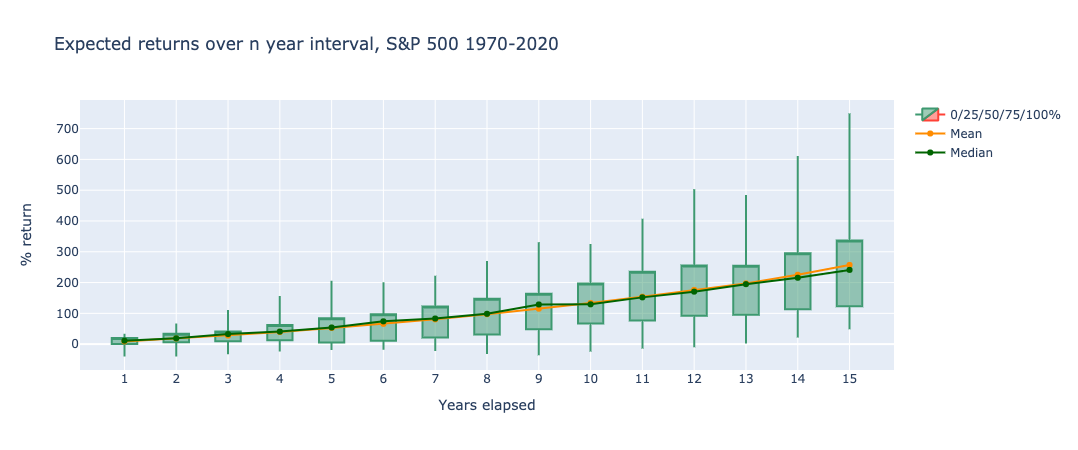

In [261]:
df = stats_by_year.iloc[0:15]
fig = go.Figure(data=[go.Candlestick(name = "0/25/50/75/100%",
                x=df['Years_elapsed'],
                open=df['25%'], high=df['max'],
                low=df['min'], close=df['75%']),
                     go.Scatter(name = "Mean", x=df["Years_elapsed"], y=df["mean"], line=dict(color='darkorange', width=2)),
                     go.Scatter(name = "Median", x=df["Years_elapsed"], y=df["50%"], line=dict(color='darkgreen', width=2))],
                layout = {"title": {"text":
                                    "Expected returns over n year interval, S&P 500 1970-2020"}})

#go.Scatter(x=df["Years_elapsed"], y=df["50%"], line=dict(color='orange', width=1))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Years elapsed', dtick = 1)
fig.update_yaxes(title_text='% return', dtick = 100)
fig.show()

fig.write_image("returns_SP500_15years.pdf")

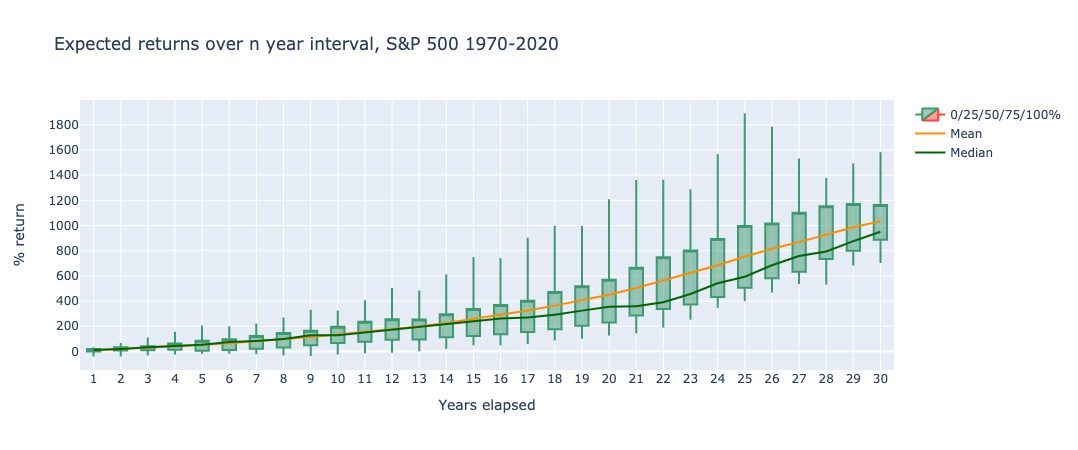

In [263]:
df = stats_by_year.iloc[0:]
fig = go.Figure(data=[go.Candlestick(name = "0/25/50/75/100%",
                x=df['Years_elapsed'],
                open=df['25%'], high=df['max'],
                low=df['min'], close=df['75%']),
                     go.Scatter(name = "Mean", x=df["Years_elapsed"], y=df["mean"], line=dict(color='darkorange', width=2)),
                     go.Scatter(name = "Median", x=df["Years_elapsed"], y=df["50%"], line=dict(color='darkgreen', width=2))],
                layout = {"title": {"text":
                                    "Expected returns over n year interval, S&P 500 1970-2020"}})

#go.Scatter(x=df["Years_elapsed"], y=df["50%"], line=dict(color='orange', width=1))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Years elapsed', dtick = 1)
fig.update_yaxes(title_text='% return', dtick = 200)
fig.show()

fig.write_image("figures/returns_SP500_30years.pdf")